# Introduction

The goal of this assignment is to train a decision tree classification model that can predict whether a given passenger on the Titanic survived or not based on their characteristics. Once the model is trained, it can be used to make predictions on new passengers by analyzing their features and assigning a predicted class label.

For classification, the decision tree algorithm splits the data into smaller and smaller subsets based on the values of the input features, with the goal of minimizing the impurity of each subset. The algorithm continues to split the data until it can no longer improve the purity of the subsets, at which point it assigns a final class label to each subset.

Import the necessary libraries:

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

Load the train and test data into pandas dataframes:

In [19]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Preprocessing

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


checking the data for null or missing values

Dropping all irrelevant columns

In [22]:
train_df.drop(["PassengerId", "Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"], axis="columns",inplace=True)
test_df.drop(["PassengerId", "Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"], axis="columns",inplace=True)

Fixing the Sex column

In [23]:
#Create an OrdinalEncoder object
encoder = OrdinalEncoder()

#Fit the encoder on the categorical variable 'Sex'
encoder.fit(train_df[['Sex']])

#Transform the 'Sex' column in both train and test data
train_df[['Sex']] = encoder.transform(train_df[['Sex']])
test_df[['Sex']] = encoder.transform(test_df[['Sex']])

In [24]:
train_df.head()

,Survived,Pclass,Sex,Age
0,0,3,1.0,22.0
1,1,1,0.0,38.0
2,1,3,0.0,26.0
3,1,1,0.0,35.0
4,0,3,1.0,35.0


In [25]:
test_df.head()

,Pclass,Sex,Age
0,3,1.0,34.5
1,3,0.0,47.0
2,2,1.0,62.0
3,3,1.0,27.0
4,3,0.0,22.0


In [26]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [27]:
test_df.isnull().sum()

Pclass     0
Sex        0
Age       86
dtype: int64

In [28]:
train_df[["Age"]].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [29]:
test_df[["Age"]].describe()

,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


Using Imputer object to fix the missing values issue

In [30]:
#Create an imputer object with median strategy:
imputer = SimpleImputer(strategy='median')
#Fit the imputer on the training data:
imputer.fit(train_df.drop(['Survived'], axis=1))

#Impute the missing values in the training and test data:
X_train = imputer.transform(train_df.drop(['Survived'], axis=1))
y_train = train_df['Survived']
X_test = imputer.transform(test_df)

Standard Scaler

In [31]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Scale the training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
#droppinf off any null rows (is any)
train_df = train_df.dropna()
test_df = test_df.dropna()

# Decision tree

In [33]:
#Create a decision tree classifier object:
clf = DecisionTreeClassifier(max_depth=2)

#Train the classifier on the training data:
clf.fit(X_train, y_train)

#Make predictions on the test data:
y_pred = clf.predict(X_test)


# Current Model Accuracy

Load the true labels from the 'gender_submission.csv' file:

In [34]:
y_test = pd.read_csv('gender_submission.csv')['Survived']

Calculate the accuracy of the model:

Accuracy: 0.8086124401913876


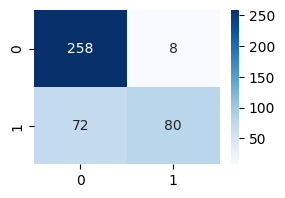

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87       266
           1       0.91      0.53      0.67       152

    accuracy                           0.81       418
   macro avg       0.85      0.75      0.77       418
weighted avg       0.83      0.81      0.79       418



In [35]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Model Improvement 

Optimize the hyperparameters of the DecisionTreeClassifier

In [36]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}

# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier()

# Create a GridSearchCV object with the hyperparameter grid and DecisionTreeClassifier
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print('Best hyperparameters:', grid_search.best_params_)
print('Best accuracy score:', grid_search.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score: 0.7834348126294646


Creating a new DecisionTreeClassifier object using the best hyperparameters

Accuracy: 0.9569377990430622


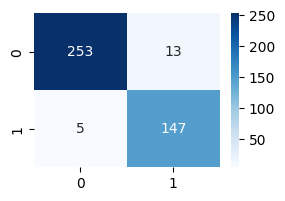

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       266
           1       0.92      0.97      0.94       152

    accuracy                           0.96       418
   macro avg       0.95      0.96      0.95       418
weighted avg       0.96      0.96      0.96       418



In [37]:
# Create a new DecisionTreeClassifier object with the best hyperparameters
clf = DecisionTreeClassifier(**grid_search.best_params_)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

#classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

The model has achieved an accuracy of 0.9569, which means that it correctly classified 96% of the instances in the test set.

Plotting the Tree

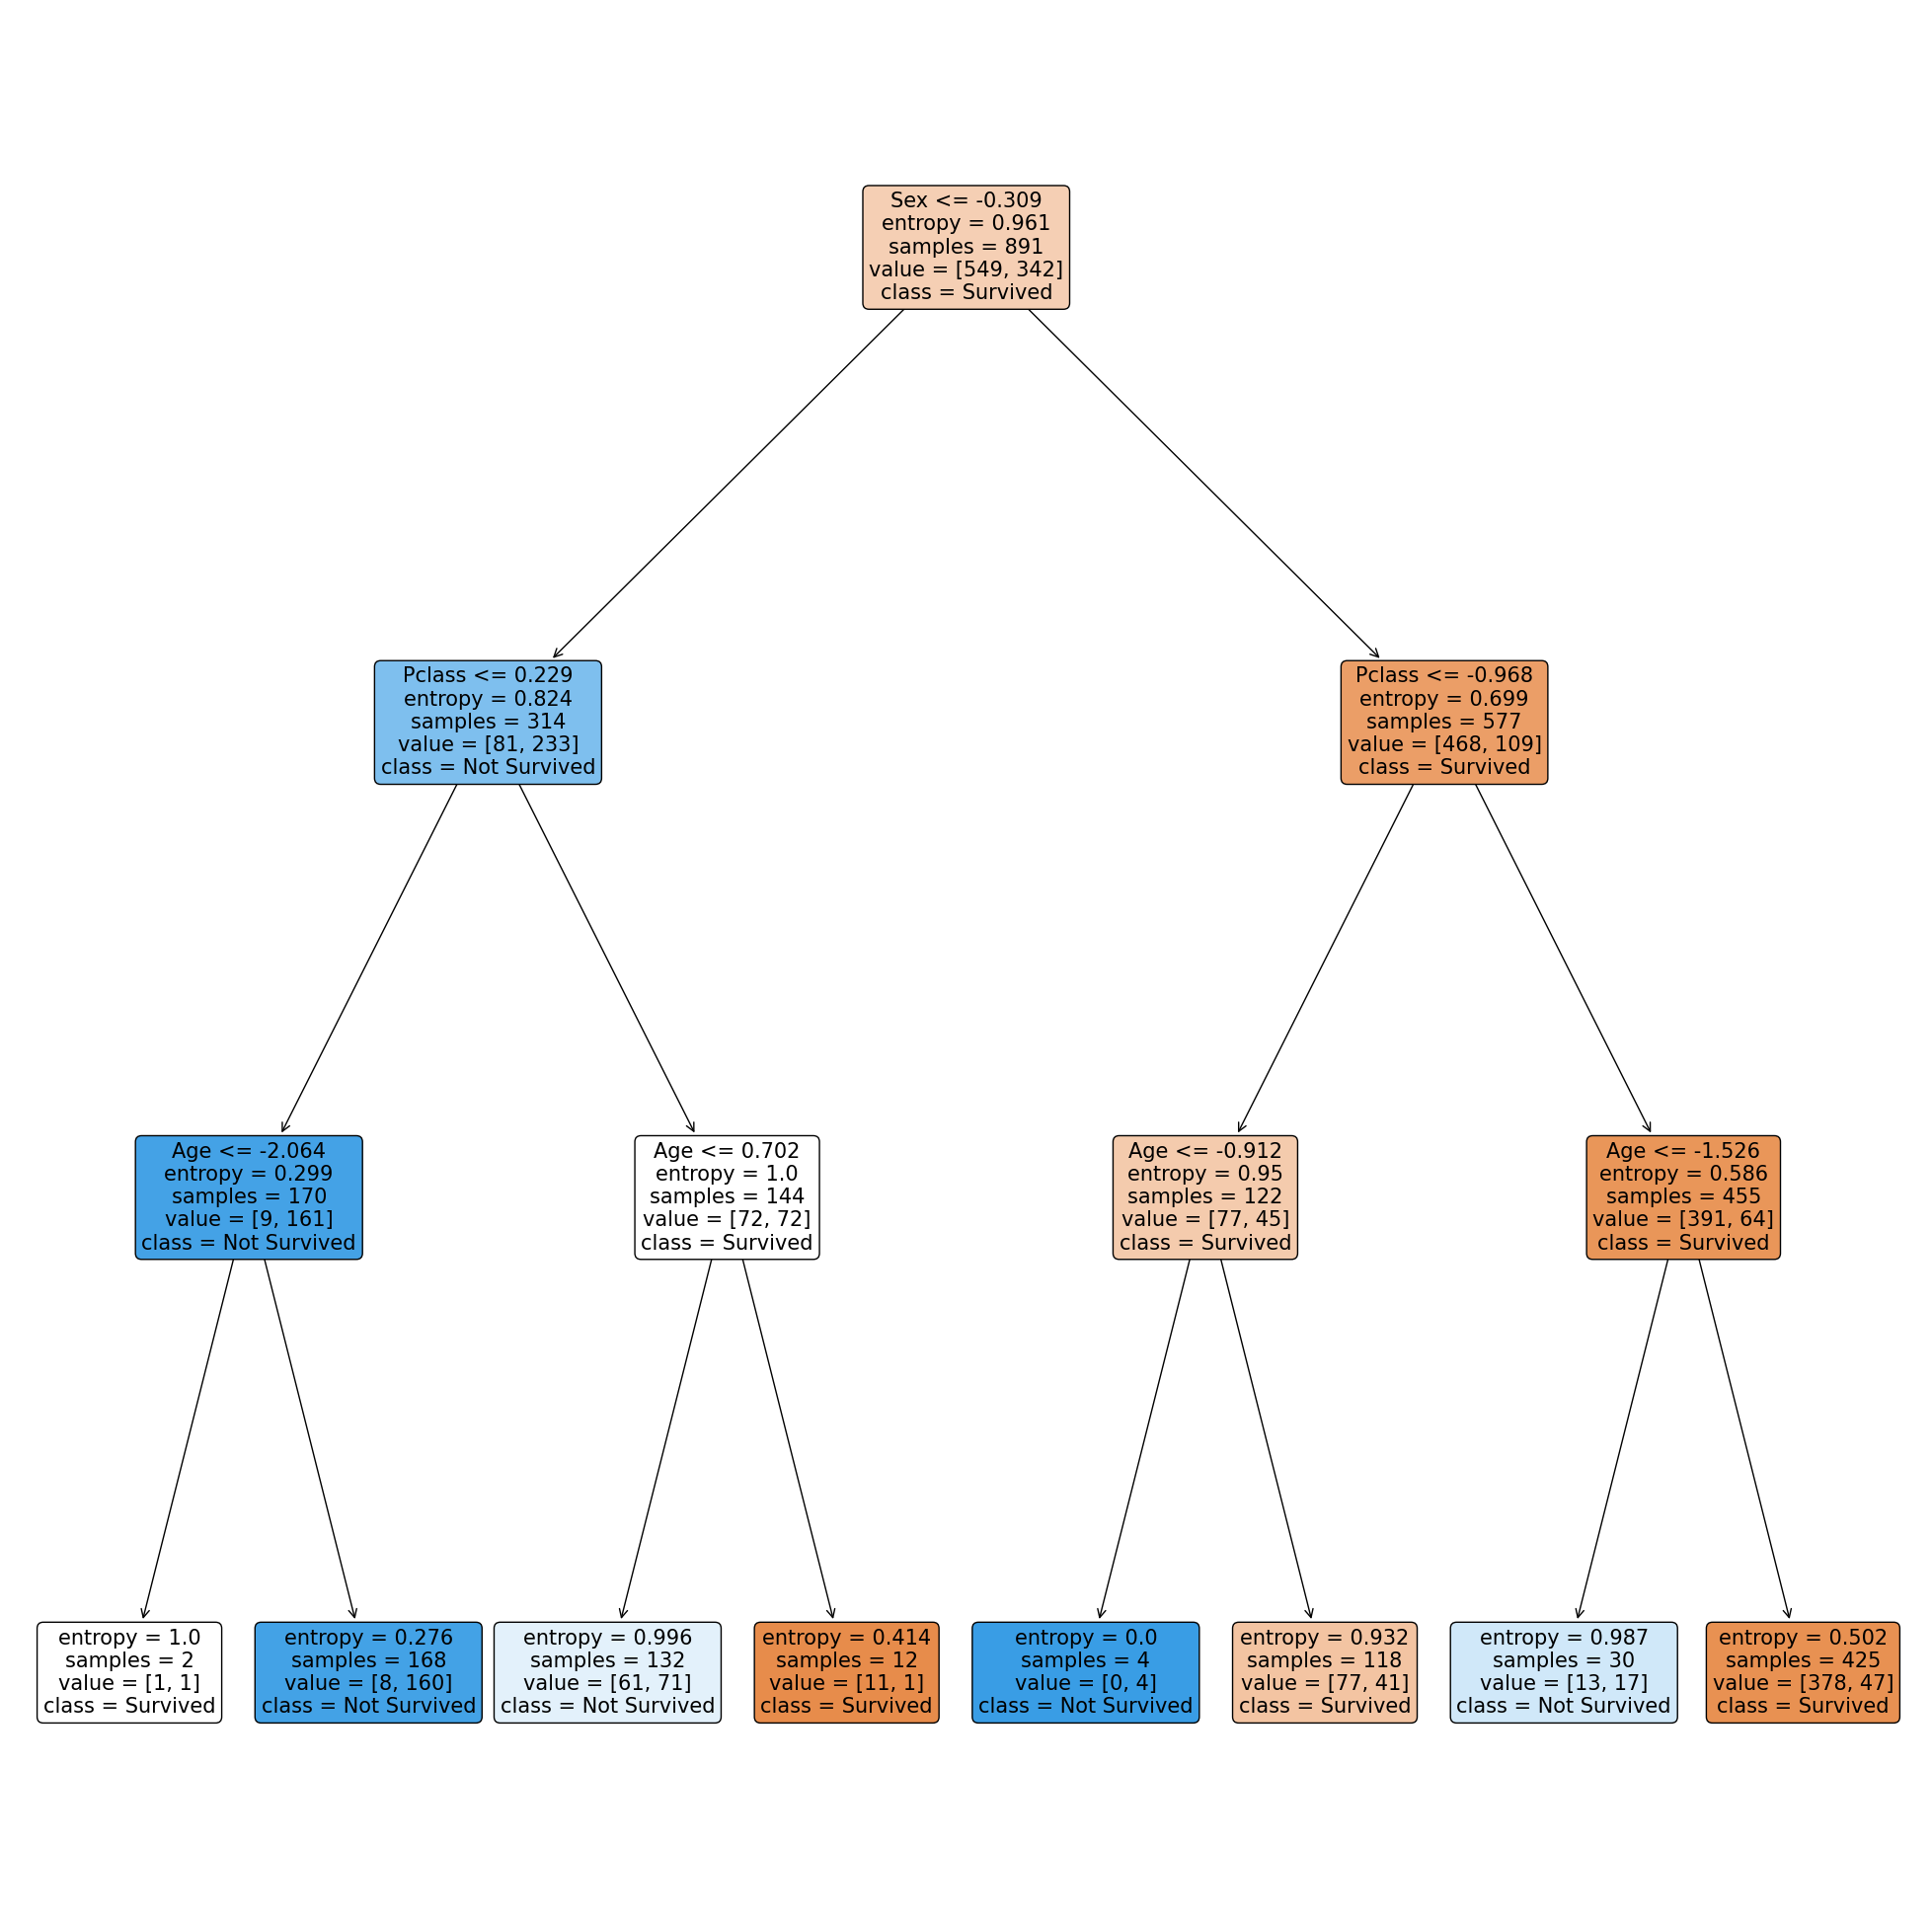

In [38]:
plt.figure(figsize=(25,25))
graph_tree = plot_tree (clf,feature_names = ['Pclass','Sex','Age'],
                        class_names = ['Survived','Not Survived'],
                        filled=True,rounded=True,fontsize = 15)